# [  ]

In [4]:
import fatbot as fb
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import os



db =             fb.db.db6
global_isd =     'P'
model_path =         '__userdata__/Render/hull_6_P/base.zip'


reward_scheme = 'hullnt'
delta_reward = True
scan_radius = 20
reset_noise = (1.0, 1.0)

# Testing

In [5]:
model = fb.PPO.load(model_path)
model, model_path



(<stable_baselines3.ppo.ppo.PPO at 0x16d95c41fd0>,
 '__userdata__/Render/hull_6_P/base.zip')

### perform testing

Total Initial States: 6
[*] World Created :: world_db6 :: Dim: ( X=60.0, Y=60.0, H=1000 )
Delta-Reward: [True],  Delta-Action: [False]
Imaging: [False],  History: [True]

Testing @ [__userdata__/Render/hull_6_P/base.zip]
[.] Testing for [1] episodes @ [30] steps

[++] Begin Epoch: Running for 1 episodes

[+] Begin Episode: 1 of 1
  [1/False]: Reward: 0.5051052570343018
  [2/False]: Reward: 3.340505599975586
  [3/False]: Reward: -1.9365053176879883
  [4/False]: Reward: 0.33150720596313477
  [5/False]: Reward: 0.08078622817993164
  [6/False]: Reward: 0.009833812713623047
  [7/False]: Reward: 2.0072412490844727
  [8/False]: Reward: 0.006971836090087891
  [9/False]: Reward: 0.007014274597167969
  [10/False]: Reward: 0.34049320220947266
  [11/False]: Reward: 0.01058197021484375
  [12/False]: Reward: 0.009974479675292969
  [13/False]: Reward: 0.008143424987792969
  [14/False]: Reward: 0.007236480712890625
  [15/False]: Reward: 0.20684146881103516
  [16/False]: Reward: 0.004872322082519531
  

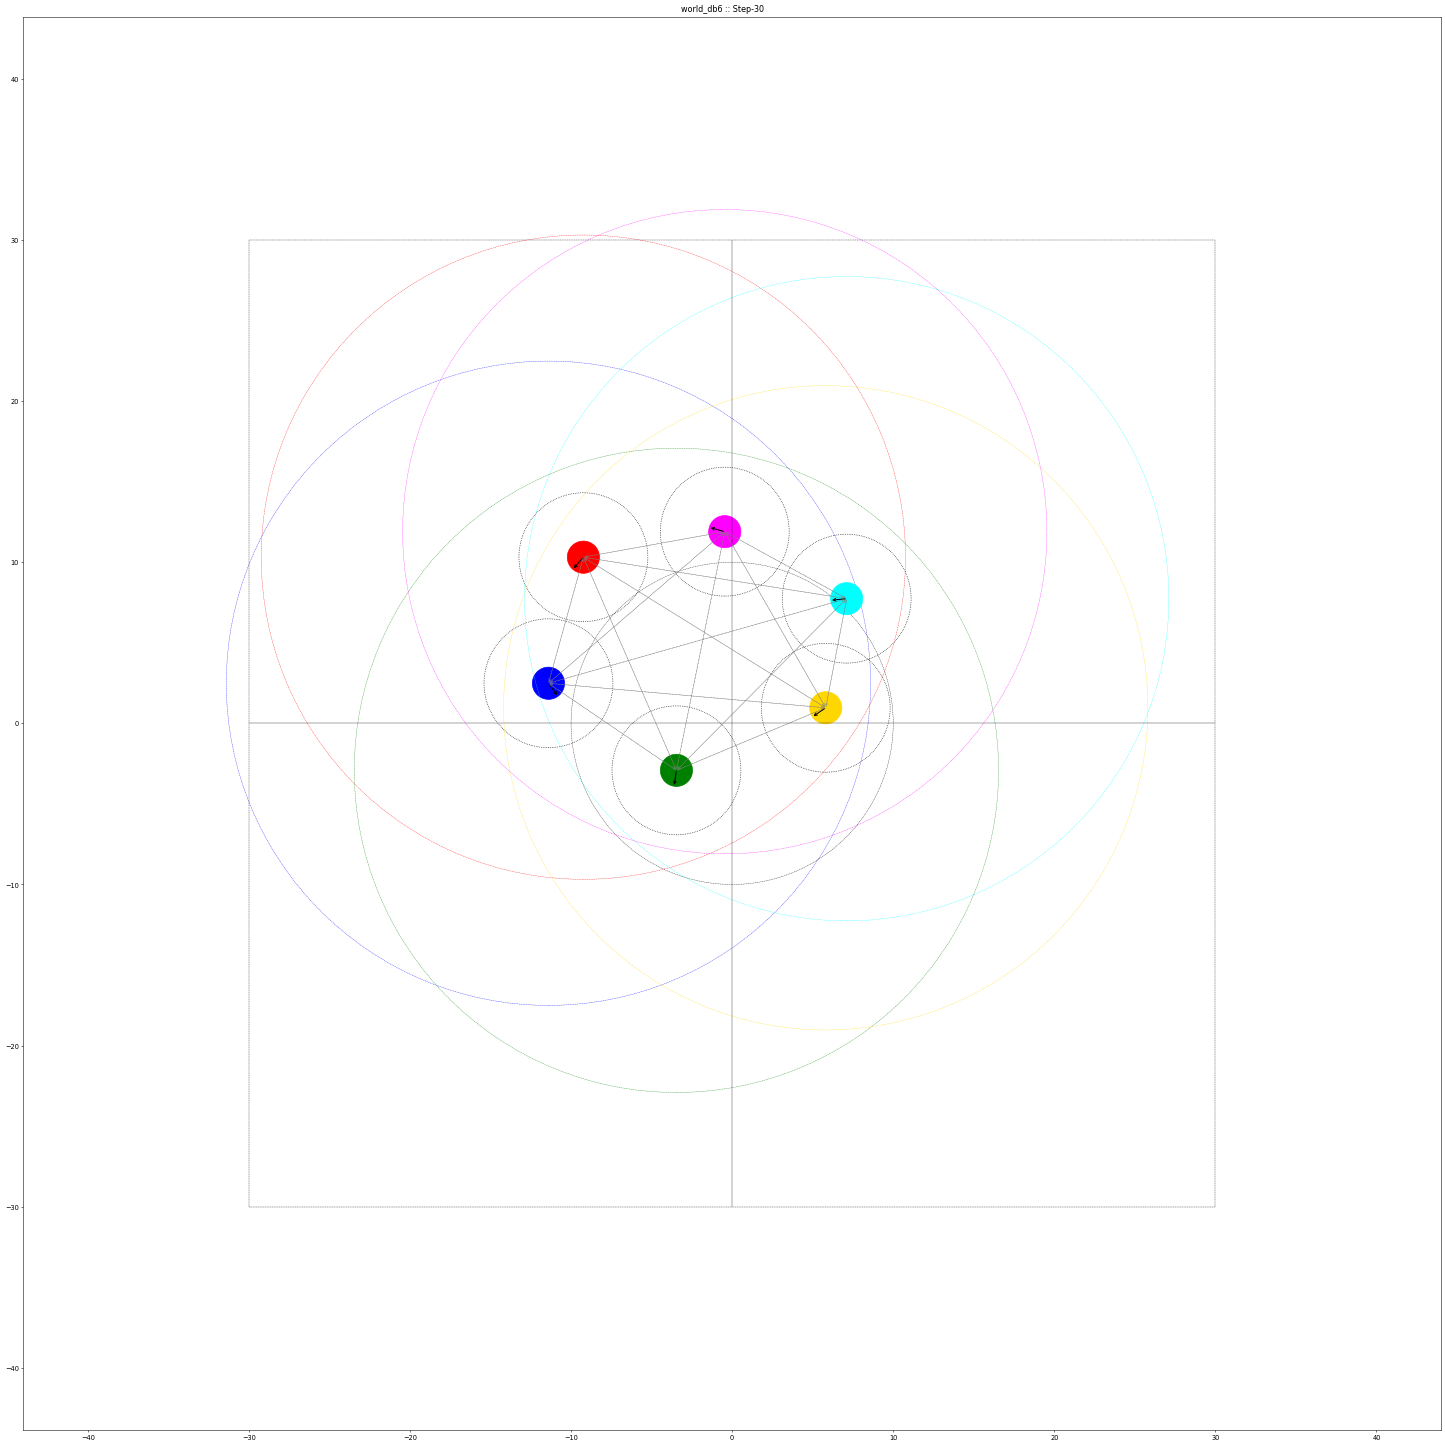

In [6]:

horizon=1000
# initial state distribution - uniformly sample from all listed states
initial_state_keys =  db.isd[global_isd] # [db.isd[db.isd_keys[0]]] #[v for k,v in db.isd.items()] 
print(f'Total Initial States: {len(initial_state_keys)}')

# build training env
testing_env = db.envF(
  testing=True, 
  scan_radius=scan_radius, 
  reset_noise=reset_noise, 
  horizon=horizon, 
  scheme=reward_scheme, 
  delta_reward=delta_reward, 
  point_list=initial_state_keys, 
  state_history=50)

##testing_env.reset()
##_=testing_env.render(local_sensors=False, reward_signal=False, fill_bots=True, state_hist_marker='o')

print(f'Testing @ [{model_path}]')
average_return, total_steps, sehist, tehist = fb.TEST(
    env=testing_env, 
    model=model, 
    episodes=1, 
    steps=30, 
    deterministic=True, 
    render_as='None', 
    save_dpi='figure', 
    make_video=False,
    video_fps=1,
    render_kwargs=dict(local_sensors=True, reward_signal=True, fill_bots=True, state_hist_marker='o'),
    starting_state=None,
    plot_results=0,
    start_n=0,
    reverb=1,
    plot_end_states=False,
    save_states='',
    save_prefix=''
)
print(f'{average_return=}, {total_steps=}, {sehist=}, {len(tehist)=}')

_=testing_env.render(local_sensors=False, reward_signal=False, fill_bots=True, state_hist_marker='')


In [ ]:
_=testing_env.render(local_sensors=False, reward_signal=False, fill_bots=True, state_hist_marker='.')